# Feed Forward Network

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD, Adamax
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Functions

In [2]:
def load_and_preprocess_data():
    #Load data
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    print(x_test.shape)
    
    #Preprocess the data
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    #scale the input image pixels to the range [0, 1]
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    #encode the labels, converting them from strings to integers
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)

    #Transform the labels into vectors in the range [0, num_classes] 
    # generate a vector for each label where the index of the label
    # is set to `1` and all other entries to `0`
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    return (x_train, y_train), (x_test, y_test)

#Build the Feed forward model
def build_and_compile_model(optimizer = 'adam', learn_rate=0.01, momentum=0.8):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(484, activation='relu', input_shape=(1024,))) # 1024 features
    model.add(Dense(484, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(484, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

# evaluate the network
def model_eval(history, epochs, img_path):
    print("Evaluating network...")

    # plot the training and test loss and accuracy
    N = np.arange(0, epochs,1)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, history.history["loss"], label="train_loss")
    plt.plot(N, history.history["val_loss"], label="test_loss")
    plt.plot(N, history.history["acc"], label="train_acc")
    plt.plot(N, history.history["val_acc"], label="test_acc")
    plt.title("Training Loss and Accuracy (Simple NN)")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.savefig(img_path)  


In [3]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

(10000, 32, 32, 3)


/home/tsaroucm/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Stochastic Gradient Descent (3 cases)

# Case 1: epochs=20, learning_rate = 0.1, decay_rate = 0.0003, momentum = 0.8, batch_size=128

In [13]:
# Case 1: epochs=20, learning_rate = 0.1, decay_rate = 0.0003, momentum = 0.8, batch_size=128
epochs20=20
learning_rate = 0.1
decay_rate = learning_rate / epochs20
momentum = 0.8
batch_size=128

optimizer = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model=build_and_compile_model(optimizer)

#validation_data: allows us to monitor our model’s progress over time during training, 
#which can be useful to identify overfitting and even support early stopping.
history20 = model.fit(x_train, y_train, epochs=epochs20, batch_size=batch_size, 
                      validation_data=(x_test, y_test), shuffle=True, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 175us/step - loss: 1.8964 - acc: 0.3096 - val_loss: 1.7044 - val_acc: 0.3820
Epoch 2/20
50000/50000 [==============================] - 8s 166us/step - loss: 1.6798 - acc: 0.3962 - val_loss: 1.6563 - val_acc: 0.4078
Epoch 3/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.5941 - acc: 0.4330 - val_loss: 1.5447 - val_acc: 0.4493
Epoch 4/20
50000/50000 [==============================] - 8s 153us/step - loss: 1.5396 - acc: 0.4512 - val_loss: 1.5112 - val_acc: 0.4642
Epoch 5/20
50000/50000 [==============================] - 8s 155us/step - loss: 1.5000 - acc: 0.4652 - val_loss: 1.4739 - val_acc: 0.4739
Epoch 6/20
50000/50000 [==============================] - 8s 155us/step - loss: 1.4677 - acc: 0.4773 - val_loss: 1.4688 - val_acc: 0.4758
Epoch 7/20
50000/50000 [==============================] - 8s 159us/step - loss: 1.4466 - acc: 0.4829 - val_loss: 1.4653 - 

epochs=20, learning_rate = 0.1, decay_rate = 0.0003, momentum = 0.8, batch_size=128
Evaluating network...


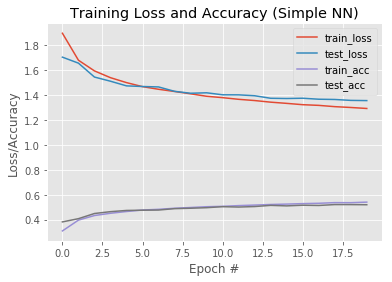

In [14]:
print("epochs=20, learning_rate = 0.1, decay_rate = 0.0003, momentum = 0.8, batch_size=128")
model_eval(history20, epochs20, "/home/tsaroucm/plot_epochs20.png")

# Case 2: epochs=40, learning_rate = 0.01, decay_rate = 0.00025, momentum = 0.6, batch_size=100

In [26]:
# Case 2: epochs=40, learning_rate = 0.01, decay_rate = 0.00025, momentum = 0.6, batch_size=100
epochs40=40
learning_rate = 0.01
decay_rate = learning_rate / epochs40
momentum = 0.6
batch_size100=100

optimizer_case2 = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model=build_and_compile_model(optimizer_case2)
history40 = model.fit(x_train, y_train, epochs=epochs40, batch_size=batch_size, 
                      validation_data=(x_test, y_test), shuffle=True, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 10s 191us/step - loss: 1.9297 - acc: 0.3022 - val_loss: 1.7512 - val_acc: 0.3829
Epoch 2/40
50000/50000 [==============================] - 9s 185us/step - loss: 1.7331 - acc: 0.3833 - val_loss: 1.6420 - val_acc: 0.4221
Epoch 3/40
50000/50000 [==============================] - 9s 178us/step - loss: 1.6470 - acc: 0.4120 - val_loss: 1.6134 - val_acc: 0.4319
Epoch 4/40
50000/50000 [==============================] - 9s 184us/step - loss: 1.5920 - acc: 0.4346 - val_loss: 1.5684 - val_acc: 0.4405
Epoch 5/40
50000/50000 [==============================] - 9s 180us/step - loss: 1.5498 - acc: 0.4483 - val_loss: 1.5289 - val_acc: 0.4483
Epoch 6/40
50000/50000 [==============================] - 9s 173us/step - loss: 1.5131 - acc: 0.4632 - val_loss: 1.4898 - val_acc: 0.4737
Epoch 7/40
50000/50000 [==============================] - 9s 180us/step - loss: 1.4820 - acc: 0.4738 - val_loss: 1.4566 -

epochs=40, learning_rate = 0.01, decay_rate = 0.00025, momentum = 0.6, batch_size=100
Evaluating network...


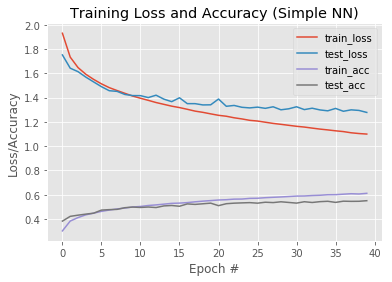

In [27]:
print("epochs=40, learning_rate = 0.01, decay_rate = 0.00025, momentum = 0.6, batch_size=100")
model_eval(history40, epochs40, "/home/tsaroucm/plot_epochs40.png")

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 9s 173us/step - loss: 2.0904 - acc: 0.2444 - val_loss: 1.9383 - val_acc: 0.3243
Epoch 2/40
50000/50000 [==============================] - 8s 153us/step - loss: 1.9246 - acc: 0.3148 - val_loss: 1.8539 - val_acc: 0.3529
Epoch 3/40
50000/50000 [==============================] - 8s 154us/step - loss: 1.8563 - acc: 0.3443 - val_loss: 1.8023 - val_acc: 0.3695
Epoch 4/40
50000/50000 [==============================] - 8s 159us/step - loss: 1.8123 - acc: 0.3628 - val_loss: 1.7665 - val_acc: 0.3746
Epoch 5/40
50000/50000 [==============================] - 8s 167us/step - loss: 1.7780 - acc: 0.3759 - val_loss: 1.7357 - val_acc: 0.3907
Epoch 6/40
50000/50000 [==============================] - 8s 165us/step - loss: 1.7502 - acc: 0.3853 - val_loss: 1.7064 - val_acc: 0.4012
Epoch 7/40
50000/50000 [==============================] - 8s 159us/step - loss: 1.7249 - acc: 0.3941 - val_loss: 1.6873 - 

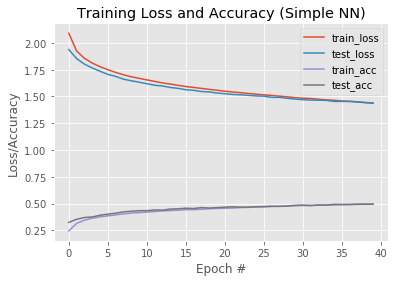

In [28]:
# What happens in case 2, if I remove one fully-connected(Dense) layer? 
# How does that affect training and the model’s final performance?

model_1_hidden_layer = Sequential()
model_1_hidden_layer.add(Flatten())
model_1_hidden_layer.add(Dense(484, activation='relu', input_shape=(1024,))) # 1024 features
model_1_hidden_layer.add(Dropout(0.25))
model_1_hidden_layer.add(Dense(484, activation='relu'))
model_1_hidden_layer.add(Dense(num_classes, activation='softmax'))
model_1_hidden_layer.compile(loss='categorical_crossentropy',optimizer=optimizer_case2,metrics=['accuracy'])

# train the new model, with one hidden layer less
history40b = model_1_hidden_layer.fit(x_train, y_train, epochs=epochs40, batch_size=batch_size100,
                                      validation_data=(x_test, y_test), shuffle=True, verbose=1)
model_eval(history40b, epochs40, "/home/tsaroucm/plot_1_hidd_layer.png")

# Case 3: epochs=60, learning_rate = 0.001, decay_rate = 0.000016, momentum = 0.4, batch_size=40

In [17]:
epochs60=60
learning_rate = 0.001
decay_rate = learning_rate / epochs60
momentum = 0.4
batch_size=40

optimizer = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model=build_and_compile_model(optimizer)
history60 = model.fit(x_train, y_train, epochs=epochs60, batch_size=batch_size, 
                      validation_data=(x_test, y_test), shuffle=True, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 16s 315us/step - loss: 2.1194 - acc: 0.2248 - val_loss: 1.9680 - val_acc: 0.3089
Epoch 2/60
50000/50000 [==============================] - 15s 294us/step - loss: 1.9415 - acc: 0.3047 - val_loss: 1.8698 - val_acc: 0.3409
Epoch 3/60
50000/50000 [==============================] - 15s 294us/step - loss: 1.8646 - acc: 0.3381 - val_loss: 1.8063 - val_acc: 0.3624
Epoch 4/60
50000/50000 [==============================] - 15s 301us/step - loss: 1.8128 - acc: 0.3572 - val_loss: 1.7633 - val_acc: 0.3758
Epoch 5/60
50000/50000 [==============================] - 16s 313us/step - loss: 1.7733 - acc: 0.3730 - val_loss: 1.7281 - val_acc: 0.3912
Epoch 6/60
50000/50000 [==============================] - 14s 289us/step - loss: 1.7406 - acc: 0.3838 - val_loss: 1.7028 - val_acc: 0.4008
Epoch 7/60
50000/50000 [==============================] - 14s 289us/step - loss: 1.7143 - acc: 0.3930 - val_loss: 1.

epochs=60, learning_rate = 0.001, decay_rate = 0.000016, momentum = 0.4, batch_size=40
Evaluating network...


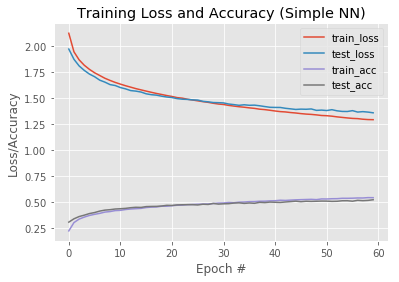

In [18]:
print("epochs=60, learning_rate = 0.001, decay_rate = 0.000016, momentum = 0.4, batch_size=40")
model_eval(history60, epochs60, "/home/tsaroucm/plot_epochs60.png")

# Tune the Training Optimization Algorithm

In [9]:
# create model
model_grid = KerasClassifier(build_fn=build_and_compile_model, epochs=40, batch_size=100, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

#param_grid = a dictionary of hyperparameters to evaluate
#n_jobs = -1(the process will use all cores on your machine)
#cv = cross validation is used to evaluate each individual model
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.481840 using {'optimizer': 'Adamax'}
0.453160 (0.008443) with: {'optimizer': 'SGD'}
0.455640 (0.008030) with: {'optimizer': 'RMSprop'}
0.459180 (0.004733) with: {'optimizer': 'Adagrad'}
0.447320 (0.020807) with: {'optimizer': 'Adadelta'}
0.476480 (0.002553) with: {'optimizer': 'Adam'}
0.481840 (0.008488) with: {'optimizer': 'Adamax'}
0.467440 (0.004094) with: {'optimizer': 'Nadam'}


### Train the model with the best optimizer: Adamax

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.8937 - acc: 0.3165 - val_loss: 1.7070 - val_acc: 0.3818
Epoch 2/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.6827 - acc: 0.3980 - val_loss: 1.5989 - val_acc: 0.4246
Epoch 3/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.5962 - acc: 0.4283 - val_loss: 1.5303 - val_acc: 0.4562
Epoch 4/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.5338 - acc: 0.4524 - val_loss: 1.5037 - val_acc: 0.4638
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.4934 - acc: 0.4684 - val_loss: 1.4832 - val_acc: 0.4686
Epoch 6/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.4583 - acc: 0.4801 - val_loss: 1.4514 - val_acc: 0.4832
Epoch 7/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.4260 - acc: 0.4900 - val_loss: 1.

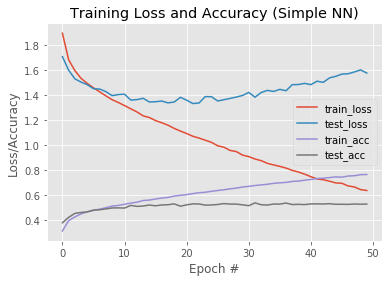

In [39]:
# Case 4: use Adamax optimizer
epochs=50
learning_rate = 0.2
batch_size=100

model=build_and_compile_model('adamax')
history_adamax = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                      validation_data=(x_test, y_test), shuffle=True, verbose=1)
# Evaluate
model_eval(history_adamax, epochs, "/home/tsaroucm/plot_Adamax.png")

# Tune Learning Rate and Momentum

In [8]:
# create model
model_grid = KerasClassifier(build_fn=build_and_compile_model, epochs=40, batch_size=100, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
optimizer = ['Adamax']
param_grid = dict(learn_rate=learn_rate, momentum=momentum, optimizer=optimizer)
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.492400 using {'learn_rate': 0.2, 'momentum': 0.2, 'optimizer': 'Adamax'}
0.478600 (0.010043) with: {'learn_rate': 0.001, 'momentum': 0.0, 'optimizer': 'Adamax'}
0.490520 (0.002927) with: {'learn_rate': 0.001, 'momentum': 0.2, 'optimizer': 'Adamax'}
0.481120 (0.001948) with: {'learn_rate': 0.001, 'momentum': 0.4, 'optimizer': 'Adamax'}
0.480740 (0.004721) with: {'learn_rate': 0.001, 'momentum': 0.6, 'optimizer': 'Adamax'}
0.478300 (0.006374) with: {'learn_rate': 0.001, 'momentum': 0.8, 'optimizer': 'Adamax'}
0.485780 (0.004572) with: {'learn_rate': 0.001, 'momentum': 0.9, 'optimizer': 'Adamax'}
0.482940 (0.001784) with: {'learn_rate': 0.01, 'momentum': 0.0, 'optimizer': 'Adamax'}
0.484060 (0.002498) with: {'learn_rate': 0.01, 'momentum': 0.2, 'optimizer': 'Adamax'}
0.483640 (0.006114) with: {'learn_rate': 0.01, 'momentum': 0.4, 'optimizer': 'Adamax'}
0.479480 (0.001229) with: {'learn_rate': 0.01, 'momentum': 0.6, 'optimizer': 'Adamax'}
0.479800 (0.006690) with: {'learn_rate': 0.

## Train the model with the findings from the hyperparameter tuning

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 10s 201us/step - loss: 14.4025 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/40
50000/50000 [==============================] - 9s 177us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/40
50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/40
50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/40
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/40
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/40
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_l

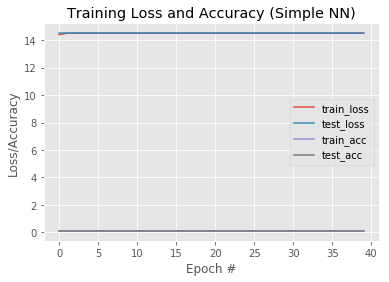

In [44]:
# Case 5: epochs=40, learning_rate = 0.2, decay_rate = 0.005, momentum = 0.2, batch_size=100
epochs=40
learning_rate = 0.2
batch_size=100
decay_rate = 0.005
momentum = 0.2

optimizer = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model=build_and_compile_model(optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                      validation_data=(x_test, y_test), shuffle=True, verbose=1)
# Evaluate
model_eval(history, epochs, "/home/tsaroucm/plot_SGD_after_tuning.png")